# Linear regression implementation in numpy

Linear equation is:

$y = WX + b$

Gradient descent equation is:

$W = W - \alpha \frac{\partial L}{\partial W}$

$b = b - \alpha \frac{\partial L}{\partial b}$

Root mean squared error (RMSE) is:

$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2}$

In [1]:
import numpy as np

In [5]:
class linear_regression:

  def __init__(self, learning_rate, no_of_iterations):
    """Initializes the hyperparameter of the model"""
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.is_fitted = False
    np.random.seed(42)

  def fit(self, X, y):
    """Fits the data to the model, basically performs gradient descent in this function"""
    # We perform batch gradient descent here

    # Check whether X and y are numpy arrays
    if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
      raise Exception("X and y are not numpy arrays")

    # Verify the shapes of X and y
    if X.shape[0] != y.shape[0]:
      raise Exception("X and y have different number of rows")

    # Ensure the data only conatins numeric values
    if not np.issubdtype(X.dtype, np.number) or not np.issubdtype(y.dtype, np.number):
      raise Exception("X and y have non-numeric values")



    self.m, self.n = X.shape # number of training examples, number of features

    # Initalize weights and biases

    self.W = np.random.randn(self.n) # the parameter here is the size of the array to be created having n random elements
    self.b = np.random.randn()

    for _ in range(self.no_of_iterations):
      # Calculate predicted values
      y_predicted = X.dot(self.W) + self.b

      # Calculate gradients
      dW = (2/self.m) * X.T.dot(y_predicted - y)
      db = (2/self.m) * np.sum(y_predicted - y)

      # Update weights and bias
      self.W = self.W - self.learning_rate * dW
      self.b = self.b - self.learning_rate * db

    self.is_fitted = True

  def predict(self, X):
    """Predicts the output for a given input"""
    if not self.is_fitted:
      raise Exception("Model not fitted yet")

    return X.dot(self.W) + self.b

  def rmse(self, y_true, y_pred):
    """Calculates the root mean squared error"""

    if not self.is_fitted:
      raise Exception("Model not fitted yet")

    return np.sqrt(np.mean(np.square(y_pred - y_true)))

In [6]:
np.random.seed(0)
X = np.random.randn(100, 1) * 2 + 5  # house sizes
y = 2.5 * X.flatten() + 1.0 + np.random.randn(100) * 0.5  # prices with noise

In [7]:
# Train the model
lr = linear_regression(learning_rate=0.01, no_of_iterations=1000)
lr.fit(X, y)

In [8]:
# Make predictions and evaluate
y_pred = lr.predict(X)
rmse_score = lr.rmse(y, y_pred)

print(f"RMSE: {rmse_score:.4f}")
print(f"Learned weight: {lr.W[0]:.4f} (true: 2.5)")
print(f"Learned bias: {lr.b:.4f} (true: 1.0)")

RMSE: 0.5144
Learned weight: 2.5370 (true: 2.5)
Learned bias: 0.8452 (true: 1.0)


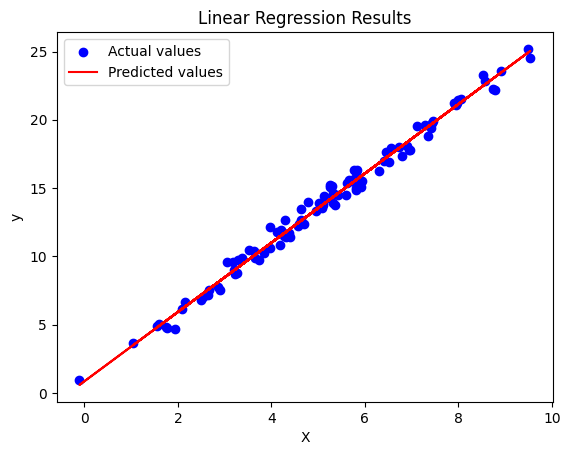

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Actual values')
plt.plot(X, y_pred, color='red', label='Predicted values')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Results')
plt.legend()
plt.show()

# Linear Regression in scikit learn

In [16]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

In [17]:
reg = LR()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
y_pred_sklearn = reg.predict(X)

# Calculate RMSE
rmse_sklearn = np.sqrt(mean_squared_error(y, y_pred_sklearn))

print(f"Scikit-learn RMSE: {rmse_sklearn:.4f}")
print(f"Scikit-learn Learned weight: {reg.coef_[0]:.4f} (true: 2.5)")
print(f"Scikit-learn Learned bias: {reg.intercept_:.4f} (true: 1.0)")

Scikit-learn RMSE: 0.5141
Scikit-learn Learned weight: 2.5287 (true: 2.5)
Scikit-learn Learned bias: 0.8942 (true: 1.0)


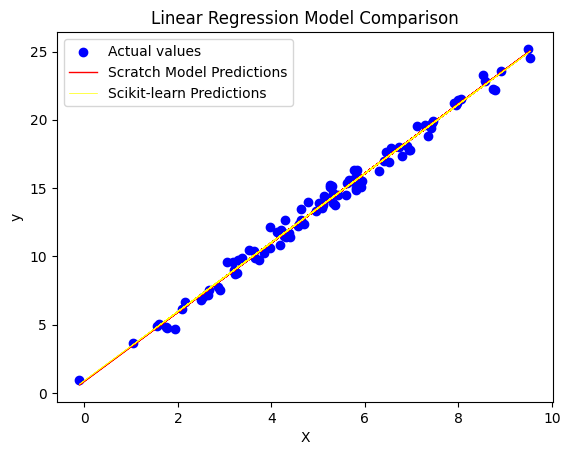

In [31]:
plt.scatter(X, y, color='blue', label='Actual values')
plt.plot(X, y_pred, color='red', label='Scratch Model Predictions', linewidth=1)
plt.plot(X, y_pred_sklearn, color='yellow', label='Scikit-learn Predictions',linewidth=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model Comparison')
plt.legend()
plt.show()